# Assignment 3
## due 10/22 before class via email to matthesc@iu.edu

## Hurwicz Bias
Consider AR(1) models of the following form:
$$y_t=\rho y_{t-1}+e_t $$
where $e_t \sim N(0,1)$

In what follows, consider three possible values for $\rho$: 0.5, 0.85 and 0.999.
For each value, simulate 500 datasets of length 100 observations each. Then estimate the AR(1) coefficient via OLS. Plot the resulting estimates in a histogram (one for each value of $\rho$). Also report the average estimate for each of the three true values. What do you notice?


## The Dynamics of US Labor Productivity
Download real GDP $y_t$ and (non-farm) employment $e_t$ for the US from Fred. Then compute the year-over-year growth rate of labor productivity, the level of which is defined by $lp_t=\frac{y_t}{e_t}$.
Use this growth rate **up to the end of 2018** to estimate an AR(1) model (inlcude an intercept). Then forecast this growth rate until the end of the sample. Produce both point forecast and density forecasts (we covered these in Diebold's slides - you will have to simulate from your estimated model using the correct initial condition). How well does your model do? Are the actual realizations within the 5th and 95th percentuile bands implied by the density forecasts?

Then redo the exercise, but use an AR(4) model (again including an intercept). Which model produces more reasonable forecasts?

Question 1

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [18]:
e = np.random.randn(100)
#AR Model
a =[0.5]
p = len(a)
x = np.zeros(100)
for i in range(0, 100):
   x[i] = a[0]*x[i-1] + e[i]

x

array([ 0.07384013, -1.5356481 , -1.93591485, -2.88428804, -3.44093122,
       -0.43302321,  0.32387379, -1.45085611, -1.34882404,  0.52846067,
        0.95115514, -0.0604113 , -3.05845931, -2.23119474, -1.999619  ,
       -0.14623367,  1.06422333,  1.7237218 ,  0.91695156,  0.27207967,
        0.49848995, -0.72345099, -0.78665696, -0.43691108,  0.77685988,
       -0.86277067, -0.2323378 , -1.33008678, -0.73724934, -1.42744535,
       -1.29959045, -2.30609551, -1.42993668, -1.9445201 , -0.62441755,
       -1.05498594,  1.827018  ,  0.41470038, -1.58870388, -0.15417524,
        0.5901237 ,  1.69967838,  1.4492199 , -0.30521269, -1.08219062,
       -1.45976216, -0.85860853, -0.04779708, -1.36695521,  1.05587804,
        1.28631556, -0.17293168, -1.30364942, -0.56812013, -0.00602791,
       -1.13398772, -1.4445204 , -0.14284945, -0.95441522, -1.63845685,
       -0.2989702 , -1.86750643, -1.1000391 , -0.91677455, -2.34981827,
       -0.55072463, -1.14473717,  0.74026852, -0.38626631, -0.65

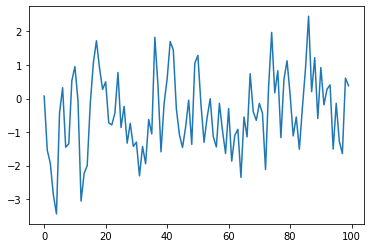

In [19]:
plt.plot(x)

In [20]:
df1 = pd.DataFrame(data=x)
df1

,0
0,0.073840
1,-1.535648
2,-1.935915
3,-2.884288
4,-3.440931
5,-0.433023
6,0.323874
7,-1.450856
8,-1.348824
9,0.528461


In [21]:
df1['xlag']=df1.shift(-1)
df1
df1.columns = ['x','xlag']
df1

,x,xlag
0,0.073840,-1.535648
1,-1.535648,-1.935915
2,-1.935915,-2.884288
3,-2.884288,-3.440931
4,-3.440931,-0.433023
5,-0.433023,0.323874
6,0.323874,-1.450856
7,-1.450856,-1.348824
8,-1.348824,0.528461
9,0.528461,0.951155


In [22]:
df1 = df1[np.isfinite(df1['xlag'])]
df1

,x,xlag
0,0.073840,-1.535648
1,-1.535648,-1.935915
2,-1.935915,-2.884288
3,-2.884288,-3.440931
4,-3.440931,-0.433023
5,-0.433023,0.323874
6,0.323874,-1.450856
7,-1.450856,-1.348824
8,-1.348824,0.528461
9,0.528461,0.951155


In [23]:
reg1 = sm.OLS(endog =df1['x'], exog = df1['xlag'])
ols_results = reg1.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.222
Model:                            OLS   Adj. R-squared (uncentered):              0.215
Method:                 Least Squares   F-statistic:                              28.04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):                    7.28e-07
Time:                        13:07:39   Log-Likelihood:                         -149.54
No. Observations:                  99   AIC:                                      301.1
Df Residuals:                      98   BIC:                                      303.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
a =[0.85]
p = len(a)
x = np.zeros(100)
for i in range(0, 100):
   x[i] = a[0]*x[i-1] + e[i]

x

array([ 0.07384013, -1.50980406, -2.45142424, -4.00004122, -5.39882224,
       -3.3015565 , -2.26593764, -3.53883999, -3.63140998, -1.88382579,
       -0.91432712, -1.31316692, -4.14444554, -4.2247438 , -4.47505386,
       -2.95021995, -1.37034679,  0.02681536,  0.07788372, -0.12019494,
        0.26028441, -0.75145422, -1.06366755, -0.94770002,  0.18977041,
       -1.08989577, -0.72736387, -1.83217717, -1.62955654, -2.44394374,
       -2.66321995, -3.92003725, -3.60892059, -4.29713426, -3.30472161,
       -3.55179054, -0.66451099, -1.06364296, -2.70015059, -1.6549513 ,
       -0.73949728,  0.77604384,  1.25901798,  0.04034263, -0.89529304,
       -1.67966593, -1.55644349, -0.94146978, -2.14330599, -0.08245444,
        0.68829027, -0.23104274, -1.4135699 , -1.11782983, -0.67212321,
       -1.7022785 , -2.32446326, -1.39638302, -2.06991606, -2.92067789,
       -1.96231798, -3.38599161, -3.04437876, -2.95447694, -4.4027364 ,
       -3.11814143, -3.51979507, -1.67918871, -2.18371097, -2.31

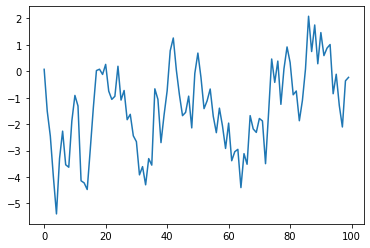

In [25]:
plt.plot(x)

In [26]:
df2 = pd.DataFrame(data=x)
df2

,0
0,0.073840
1,-1.509804
2,-2.451424
3,-4.000041
4,-5.398822
5,-3.301557
6,-2.265938
7,-3.538840
8,-3.631410
9,-1.883826


In [27]:
reg2 = sm.OLS(endog =df2['x'], exog = df2['xlag'])
ols_results = reg2.fit()
print(ols_results.summary())

KeyError: 'x'

In [28]:
a =[0.999]
p = len(a)
x = np.zeros(100)
for i in range(0, 100):
   x[i] = a[0]*x[i-1] + e[i]

x

array([  0.07384013,  -1.49880188,  -2.66539387,  -4.57905909,
        -6.57326723,  -5.27925157,  -4.73358692,  -6.34164634,
        -6.95870068,  -5.74886929,  -5.05619561,  -5.58712829,
        -8.60979482,  -9.30315011, -10.17786859,  -9.31411489,
        -8.16746061,  -6.96768301,  -6.90562467,  -7.08511515,
        -6.71557992,  -7.68156031,  -8.09881021,  -8.13429401,
        -7.13084428,  -8.37491405,  -8.16749161,  -9.373242  ,
        -9.4360747 , -10.48545931, -11.06084162, -12.70608107,
       -12.97026391, -14.18684541, -13.82481606, -14.55376841,
       -12.18470367, -12.67132759, -14.45471033, -13.80007892,
       -13.11906752, -11.70133192, -11.09024988, -12.10898227,
       -13.02645757, -13.93209796, -14.04689331, -13.65133923,
       -14.98074456, -13.22640817, -12.45480522, -13.25843988,
       -14.46236502, -14.36419807, -14.07180172, -15.18870369,
       -16.05104152, -15.45557973, -16.32311464, -17.46804077,
       -16.9303145 , -18.63140552, -18.77906   , -19.12

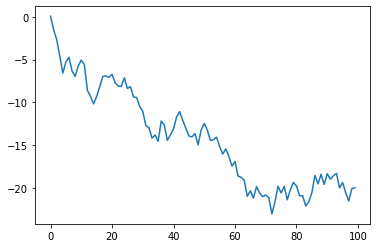

In [29]:
plt.plot(x)

In [30]:
df3 = pd.DataFrame(data=x)
df3

,0
0,0.073840
1,-1.498802
2,-2.665394
3,-4.579059
4,-6.573267
5,-5.279252
6,-4.733587
7,-6.341646
8,-6.958701
9,-5.748869


In [31]:
reg3 = sm.OLS(endog =df3['x'], exog = df3['xlag'])
ols_results = reg3.fit()
print(ols_results.summary())

KeyError: 'x'

Question 2

In [11]:
start_date = datetime.datetime(1960,1,1)
end_date = datetime.datetime.now()
DATA=pdr.get_data_fred(['GDPC1','PAYEMS',], start_date,end_date)

print(DATA)

                GDPC1  PAYEMS
DATE                         
1960-01-01   3275.757   54274
1960-02-01        NaN   54513
1960-03-01        NaN   54454
1960-04-01   3258.088   54813
1960-05-01        NaN   54475
1960-06-01        NaN   54348
1960-07-01   3274.029   54306
1960-08-01        NaN   54272
1960-09-01        NaN   54227
1960-10-01   3232.009   54142
1960-11-01        NaN   53961
1960-12-01        NaN   53742
1961-01-01   3253.826   53683
1961-02-01        NaN   53557
1961-03-01        NaN   53659
1961-04-01   3309.059   53627
1961-05-01        NaN   53786
1961-06-01        NaN   53977
1961-07-01   3372.581   54123
1961-08-01        NaN   54298
1961-09-01        NaN   54388
1961-10-01   3438.721   54522
1961-11-01        NaN   54742
1961-12-01        NaN   54872
1962-01-01   3500.054   54891
1962-02-01        NaN   55188
1962-03-01        NaN   55275
1962-04-01   3531.683   55602
1962-05-01        NaN   55628
1962-06-01        NaN   55644
...               ...     ...
2017-04-01

In [12]:
DATA = DATA[np.isfinite(DATA['GDPC1'])]

DATA

,GDPC1,PAYEMS
DATE,,
1960-01-01,3275.757,54274
1960-04-01,3258.088,54813
1960-07-01,3274.029,54306
1960-10-01,3232.009,54142
1961-01-01,3253.826,53683
1961-04-01,3309.059,53627
1961-07-01,3372.581,54123
1961-10-01,3438.721,54522
1962-01-01,3500.054,54891


In [32]:
DATA['Labor Prod'] = DATA['GDPC1']/DATA['PAYEMS']  
DATA['Constant'] = 1
DATA
#Getting labor productvity 

,GDPC1,PAYEMS,Labor Prod,Labor Prod Growth,Constant
DATE,,,,,
1960-01-01,3275.757,54274,0.060356,-0.000001,1
1960-04-01,3258.088,54813,0.059440,-0.015176,1
1960-07-01,3274.029,54306,0.060289,-0.001118,1
1960-10-01,3232.009,54142,0.059695,-0.010951,1
1961-01-01,3253.826,53683,0.060612,0.004239,1
1961-04-01,3309.059,53627,0.061705,0.022352,1
1961-07-01,3372.581,54123,0.062313,0.032429,1
1961-10-01,3438.721,54522,0.063070,0.044972,1
1962-01-01,3500.054,54891,0.063764,0.056460,1


In [33]:
from statsmodels.tsa.ar_model import AR
m1 = AR(DATA['Labor Prod']).fit(maxlag=1)
DATA['forecast'] = m1.predict()
DATA #forecast is the last column
#maxlag helps us get AR(1)

/Users/ryanfrancis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,GDPC1,PAYEMS,Labor Prod,Labor Prod Growth,Constant,forecast
DATE,,,,,,
1960-01-01,3275.757,54274,0.060356,-0.000001,1,NaN
1960-04-01,3258.088,54813,0.059440,-0.015176,1,0.060581
1960-07-01,3274.029,54306,0.060289,-0.001118,1,0.059664
1960-10-01,3232.009,54142,0.059695,-0.010951,1,0.060514
1961-01-01,3253.826,53683,0.060612,0.004239,1,0.059919
1961-04-01,3309.059,53627,0.061705,0.022352,1,0.060837
1961-07-01,3372.581,54123,0.062313,0.032429,1,0.061933
1961-10-01,3438.721,54522,0.063070,0.044972,1,0.062542
1962-01-01,3500.054,54891,0.063764,0.056460,1,0.063300


In [34]:
m1.params
#Getting parameters

const            0.00012
L1.Labor Prod    1.00174
dtype: float64

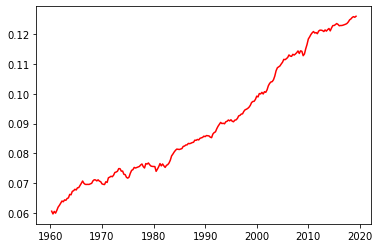

In [35]:
plt.plot(DATA['forecast'], color='red')
plt.show()

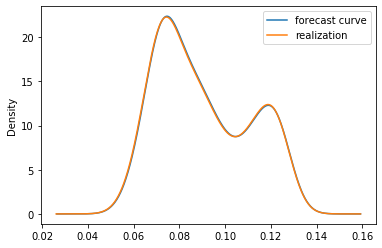

In [36]:
DATA['forecast'].plot(kind = 'kde', label = "forecast curve")
DATA['Labor Prod'].plot(kind = 'kde', label = "realization")
plt.legend()
plt.show()
#Forecast and data in the same plot

In [37]:
#Forecast for AR(4)
m2 = AR(DATA['Labor Prod']).fit(maxlag=4)
DATA['forecast4'] = m2.predict()
DATA #forecast is the last column


/Users/ryanfrancis/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


,GDPC1,PAYEMS,Labor Prod,Labor Prod Growth,Constant,forecast,forecast4
DATE,,,,,,,
1960-01-01,3275.757,54274,0.060356,-0.000001,1,NaN,NaN
1960-04-01,3258.088,54813,0.059440,-0.015176,1,0.060581,NaN
1960-07-01,3274.029,54306,0.060289,-0.001118,1,0.059664,NaN
1960-10-01,3232.009,54142,0.059695,-0.010951,1,0.060514,NaN
1961-01-01,3253.826,53683,0.060612,0.004239,1,0.059919,0.059999
1961-04-01,3309.059,53627,0.061705,0.022352,1,0.060837,0.060783
1961-07-01,3372.581,54123,0.062313,0.032429,1,0.061933,0.062203
1961-10-01,3438.721,54522,0.063070,0.044972,1,0.062542,0.062703
1962-01-01,3500.054,54891,0.063764,0.056460,1,0.063300,0.063395


In [38]:
m2.params

const            0.000148
L1.Labor Prod    1.118343
L2.Labor Prod    0.035056
L3.Labor Prod   -0.204371
L4.Labor Prod    0.051787
dtype: float64

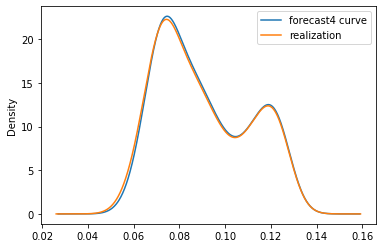

In [39]:
DATA['forecast4'].plot(kind = 'kde', label = "forecast4 curve")
DATA['Labor Prod'].plot(kind = 'kde', label = "realization")
plt.legend()
plt.show()
#Plot for AR(4) with forecast and data in the same plot. 
#AR(1) seems like a better fit than AR(4) with actual data